Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "seaborn" - maybe you meant "search"



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns

from sklearn.model_selection import KFold, cross_val_score,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ------------------------ --------------- 184.3/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
df = pd.read_csv("C:\\Users\\liuxuemeng\\Desktop\\thesis\\notebooks\\Thesis\\merged_data1.csv")

In [25]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_EDUCATION_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'AGE_YEARS',
       'YEARS_EMPLOYED', 'NAME_INCOME_TYPE_Commercial associate',
       'NAME_INCOME_TYPE_Pensioner', 'NAME_INCOME_TYPE_State servant',
       'NAME_INCOME_TYPE_Student', 'NAME_INCOME_TYPE_Working',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'OCCUPATION_TYPE_Accountants', 'OCCUPATION_TYPE_Cleaning staff',
       'OCCUPATION_TYPE_Cooking staff', 'OCCUPATION_TYPE_Cor

C:\Users\liuxuemeng\AppData\Local\Temp\ipykernel_6916\3307559355.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=count_data, x='Number of Children', y='Count', palette='rocket')


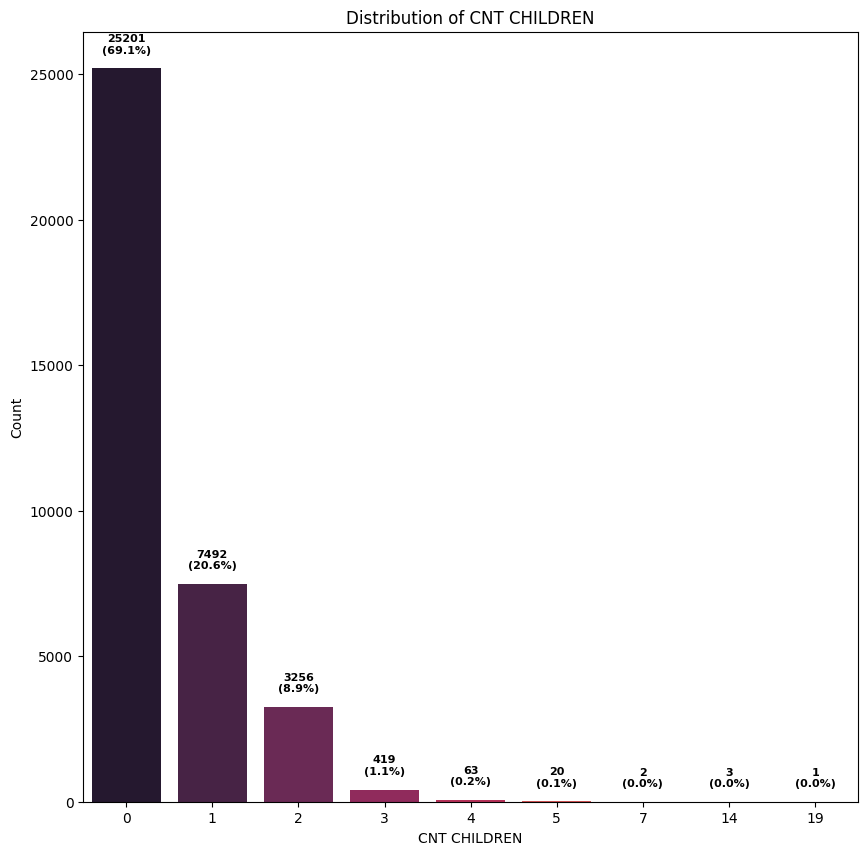

In [24]:
# Count values and create a new DataFrame
count_data = df['CNT_CHILDREN'].value_counts().reset_index()
count_data.columns = ['Number of Children', 'Count']

total = len(df)  # Total number of entries

plt.figure(figsize=(10, 10))
ax = sns.barplot(data=count_data, x='Number of Children', y='Count', palette='rocket')
# ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total:.1%}'
    ax.annotate(f'{int(height)}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., height+450), 
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

ax.set_ylabel("Count")
ax.set_xlabel("CNT CHILDREN")

# Add a title
ax.set_title("Distribution of CNT CHILDREN")

plt.show()

C:\Users\liuxuemeng\AppData\Local\Temp\ipykernel_6916\1976625161.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=count_data, x='Number of Families', y='Count', palette='rocket')


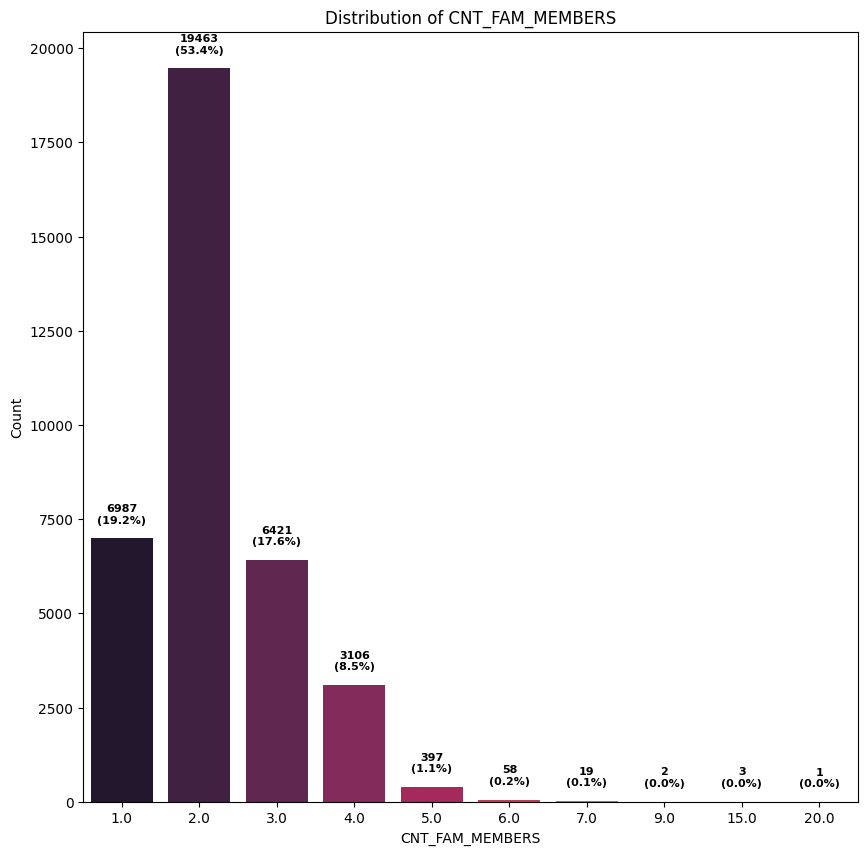

In [27]:
# Count values and create a new DataFrame
count_data = df['CNT_FAM_MEMBERS'].value_counts().reset_index()
count_data.columns = ['Number of Families', 'Count']

total = len(df)  # Total number of entries

plt.figure(figsize=(10, 10))
ax = sns.barplot(data=count_data, x='Number of Families', y='Count', palette='rocket')
# ax.bar_label(ax.containers[0])

for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total:.1%}'
    ax.annotate(f'{int(height)}\n({percentage})', 
                (p.get_x() + p.get_width() / 2., height+350), 
                ha='center', va='bottom', fontsize=8, color='black', fontweight='bold')

ax.set_ylabel("Count")
ax.set_xlabel('CNT_FAM_MEMBERS')

# Add a title
ax.set_title("Distribution of CNT_FAM_MEMBERS")

plt.show()

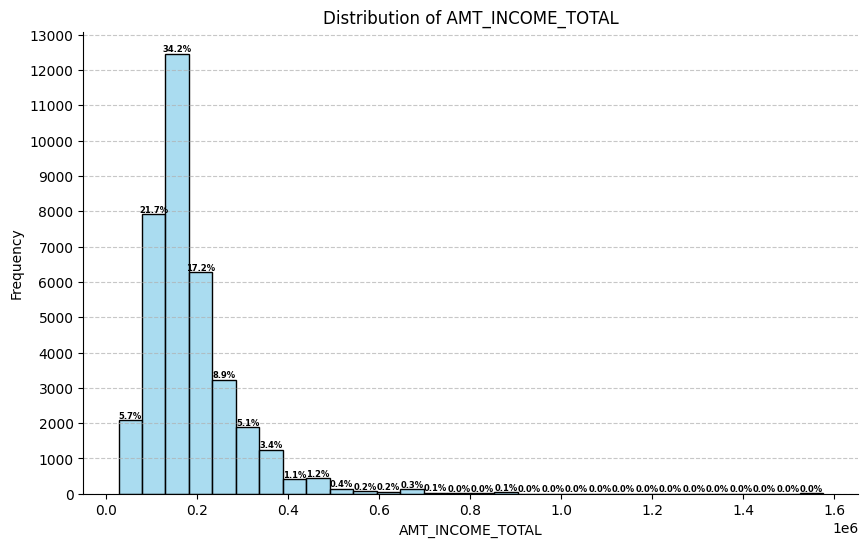

In [35]:
plt.figure(figsize=(10, 6))

ax = sns.histplot(data=df, x='AMT_INCOME_TOTAL', bins=30,
                  color='skyblue', edgecolor='black', alpha=0.7)
ax.set_xlabel('AMT_INCOME_TOTAL')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of AMT_INCOME_TOTAL')
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Calculate and annotate percentages
total = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total:.1%}'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=6, color='black', fontweight='bold')
    
# Adjust y-axis ticks and limits for better visibility of shorter bars
ax.set_ylim(0, ax.get_ylim()[1])  # Ensure the y-axis starts from 0
ax.set_yticks(np.arange(0, ax.get_ylim()[1], step=1000))  # Adjust the step value as needed